## Visualization 3

In [40]:
import sys
# pandas to manipulate SQL answer set
import pandas as pd
import time,os
# for Posgresql and other RDBMS
from sqlalchemy import create_engine,event,schema,Table,Column, Integer, Float, String, MetaData, TIMESTAMP, Date, text, inspect
from sqlalchemy_utils import database_exists,create_database
from sqlalchemy.orm import sessionmaker
from sqlalchemy.schema import CreateTable
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Define your PostgreSQL server connection details
database_name = 'group_7_2024'
username = 'group_7_2024'
password = 'SNMsELrjkpQC'
host = 'dbcourse.cs.aalto.fi'  # or your server address
port = '5432'  # default PostgreSQL port


# Create a connection URL
connection_url = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database_name}'

try:
    # Create an engine to test the connection
    engine = create_engine(connection_url) #.replace(f'/{database_name}', '/postgres'))  # Connect to the default 'postgres' database
    with engine.connect() as conn:
        print("Connection to PostgreSQL server successful.")
except Exception as e:
    print(f"Failed to connect to the PostgreSQL server: {e}")
    exit(1)

# Check if the database already exists
if not database_exists(connection_url):
    # Create the new database
    create_database(connection_url)
    print(f"Database '{database_name}' created successfully.")
else:
    print(f"Database '{database_name}' already exists.")

Connection to PostgreSQL server successful.
Database 'group_7_2024' already exists.


For each month, what are the number of valid volunteer applications compared to the number of valid requests?

What months have the most and least for each. 

How about the difference between the requests and volunteers for each month? Is there a general/seasonal trend?

Is there any correlation between the time of the year and number of requests and volunteers?

In [47]:
applied = ("""
                   	select month as months_no, count(*)
					from
						(
						select id,
                   			generate_series(extract(month from start_date)::integer, 
                   			extract(month from end_date)::integer) as month
						from
							(
							select
								r.id,
								start_date,
								end_date
							from volunteer_application va
							join request r on va.request_id = r.id
							where va.is_valid = true
                   			) a
                   		) a
					group by
						month
					order by
						month;
					""")
applied_simple = pd.read_sql_query(applied, engine)

requested = ("""select month as months_no,count(*)
           from 
                (select id,generate_series(EXTRACT(MONTH FROM start_date)::integer,EXTRACT(MONTH FROM end_date)::integer) as month
				from request) a 
           group by month
           order by month;""")
requested_simple = pd.read_sql_query(requested, engine)

print(requested_simple)
print(applied_simple)


    months_no  count
0           1     22
1           2     21
2           3     29
3           4     25
4           5     27
5           6     45
6           7     40
7           8     45
8           9     44
9          10     31
10         11     33
11         12     34
    months_no  count
0           1    128
1           2    127
2           3    193
3           4    167
4           5    177
5           6    282
6           7    294
7           8    269
8           9    282
9          10    190
10         11    214
11         12    201


What are the number of valid applications compared to requests for each month?
For each month, there is at least three times higher interest of volunteers than the number of requests.

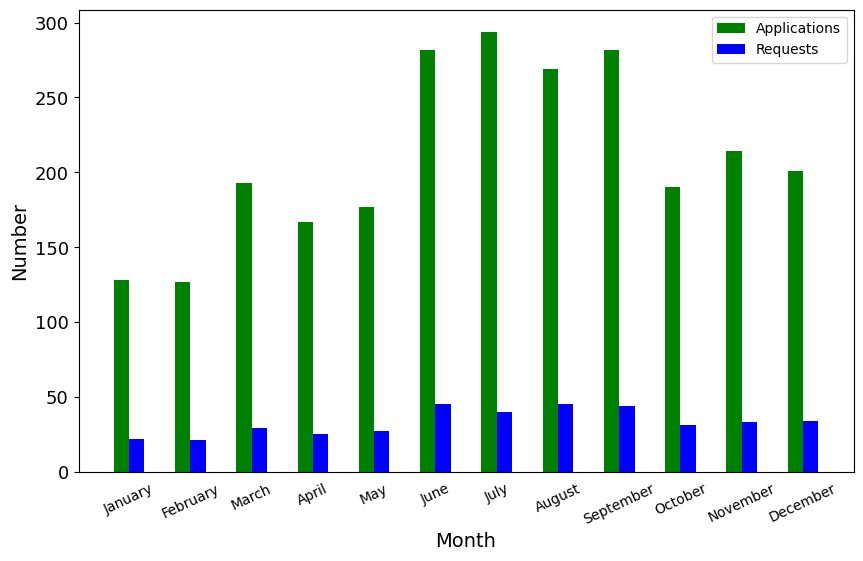

In [43]:
import matplotlib.pyplot as plt
import numpy as np


months_mapping = {1: 'January', 2: 'February', 3: 'March', 4:'April', 5:'May', 6:'June', 7:'July', 8: 'August', 9:'September', 10:'October', 11:'November', 12:'December'}

# Map the numeric values to strings
requested_df['months'] = requested_simple['months_no'].map(months_mapping)
applied_df['months'] = applied_simple['months_no'].map(months_mapping)

plt.figure(figsize=(8, 6))  # setting the figure width, height in inches
x = np.arange(len(requested_df['months'])) 
bar_width = 0.25 # setting the width of one bar

# Plotting histograms
plt.bar(x - bar_width/2, applied_df['count'], width=bar_width, color='green', label='Applications')
plt.bar(x + bar_width/2, requested_df['count'], width=bar_width, color='Blue', label='Requests')

# Add labels and legend
plt.xlabel('Month', fontsize=14)
#plt.ylim(40,65)
plt.ylabel('Number', fontsize=14) #setting axis label
plt.legend() # add legend
plt.xticks(x, requested_df['months'], rotation=25, ha='center', fontsize=10) #add labels of cities under angle in the center of the bar
plt.yticks( fontsize=13) #add labels of cities under angle
plt.gca().xaxis.set_tick_params(which='both', bottom=False, top=False)  # Remove ticks

plt.gcf().set_size_inches(10, 6) 

# Show plot
plt.show()

What months have the most and least for each?
Answer: The smallest number of applications and requests for volunteers is in February, while in Augustu is largest both the demand and supply of volunteers.

    months_no  count     months
0           1     22    January
1           2     21   February
2           3     29      March
3           4     25      April
4           5     27        May
5           6     45       June
6           7     40       July
7           8     45     August
8           9     44  September
9          10     31    October
10         11     33   November
11         12     34   December


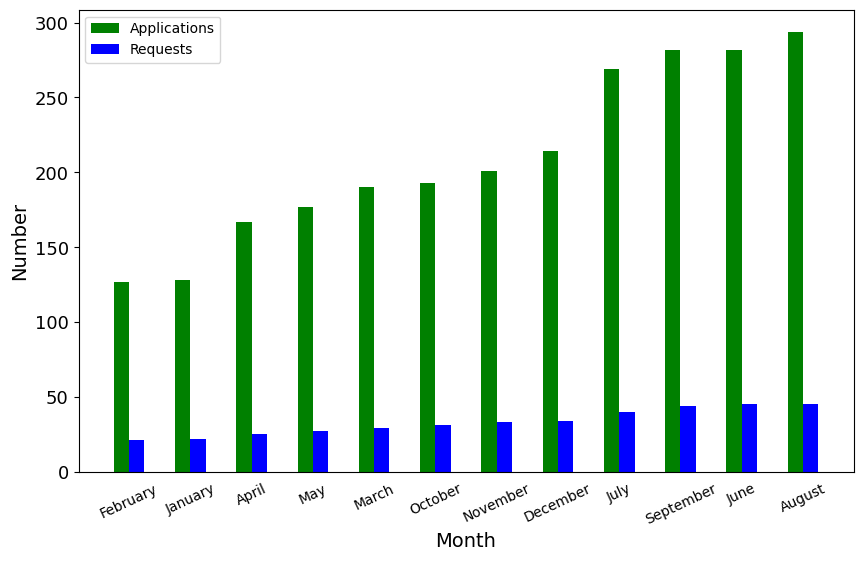

In [37]:
import pandas as pd
requested_df_sorted = requested_df.sort_values(by='count')
applied_df_sorted = applied_df.sort_values(by='count')
print(requested_df)

plt.figure(figsize=(8, 6))  # setting the figure width, height in inches
x = np.arange(len(requested_df_sorted['months'])) 
bar_width = 0.25 # setting the width of one bar

# Plotting histograms
plt.bar(x - bar_width/2, applied_df_sorted['count'], width=bar_width, color='green', label='Applications')
plt.bar(x + bar_width/2, requested_df_sorted['count'], width=bar_width, color='Blue', label='Requests')

# Add labels and legend
plt.xlabel('Month', fontsize=14)
#plt.ylim(40,65)
plt.ylabel('Number', fontsize=14) #setting axis label
plt.legend() # add legend
plt.xticks(x, requested_df_sorted['months'], rotation=25, ha='center', fontsize=10) #add labels of cities under angle in the center of the bar
plt.yticks( fontsize=13) #add labels of cities under angle
plt.gca().xaxis.set_tick_params(which='both', bottom=False, top=False)  # Remove ticks

plt.gcf().set_size_inches(10, 6) 

# Show plot
plt.show()



Is there any correlation between the time of the year and number of requests and volunteers?

    months_no  count_x  count_y
0           1      128       22
1           2      127       21
2           3      193       29
3           4      167       25
4           5      177       27
5           6      282       45
6           7      294       40
7           8      269       45
8           9      282       44
9          10      190       31
10         11      214       33
11         12      201       34


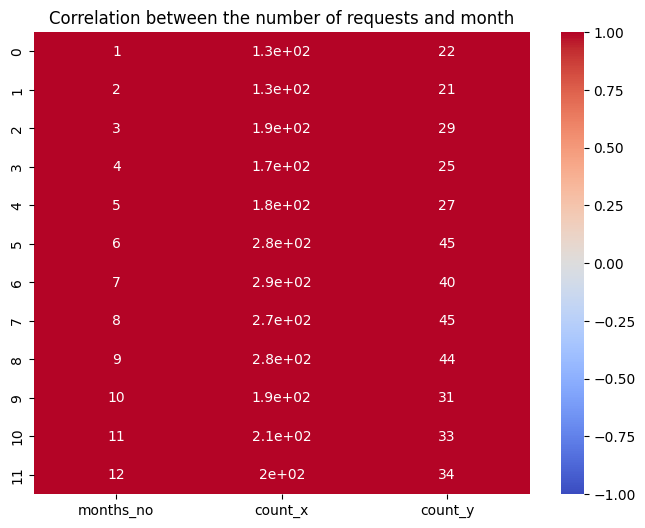

In [52]:

merged_df = applied_simple.merge(requested_simple, on='months_no', how='inner')
print (merged_df)


plt.figure(figsize=(8, 6))
sns.heatmap(merged_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between the number of requests and month')
plt.show()
